In [1]:
import numpy as np
import matplotlib.pyplot as plt
from solver import solver

In [2]:
def equilibrium(y,x):
    return np.exp(-np.sqrt(x*x+y*y)) # full thermal equilibrium = e^(-E/T)

def random_distribution(y,x):
    return np.random.random() # generates a random float between 0.0 and 1.0


# grid size  
x_start, x_end = 0.01, 50
y_start, y_end = 0.01, 50

y_gridpoints = 80
  


x_span = (x_start, x_end)
y_span = (y_start, y_end, y_gridpoints)

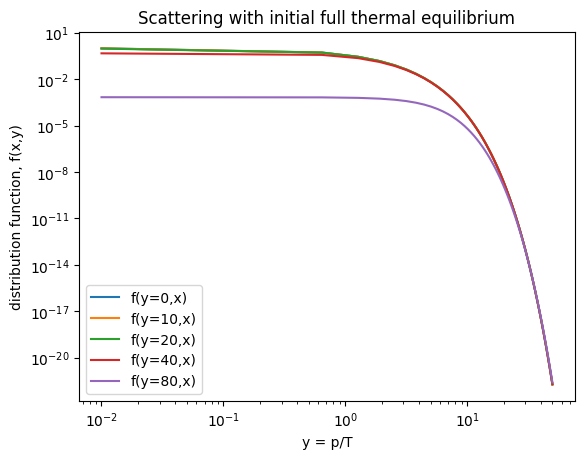

In [3]:
# solve for scattering with initial condition = full thermal equilibrium 
solv = solver(x_span,y_span,equilibrium,"scattering")
xs = solv[0]
ys = solv[1]    
fs = solv[2]

for n in [0,10,20,40,80]:
    plt.loglog(ys,fs[:,n],label=f"f(y={n},x)")
plt.xlabel("y = p/T")
plt.ylabel ("distribution function, f(x,y)")
plt.title("Scattering with initial full thermal equilibrium")
plt.legend()

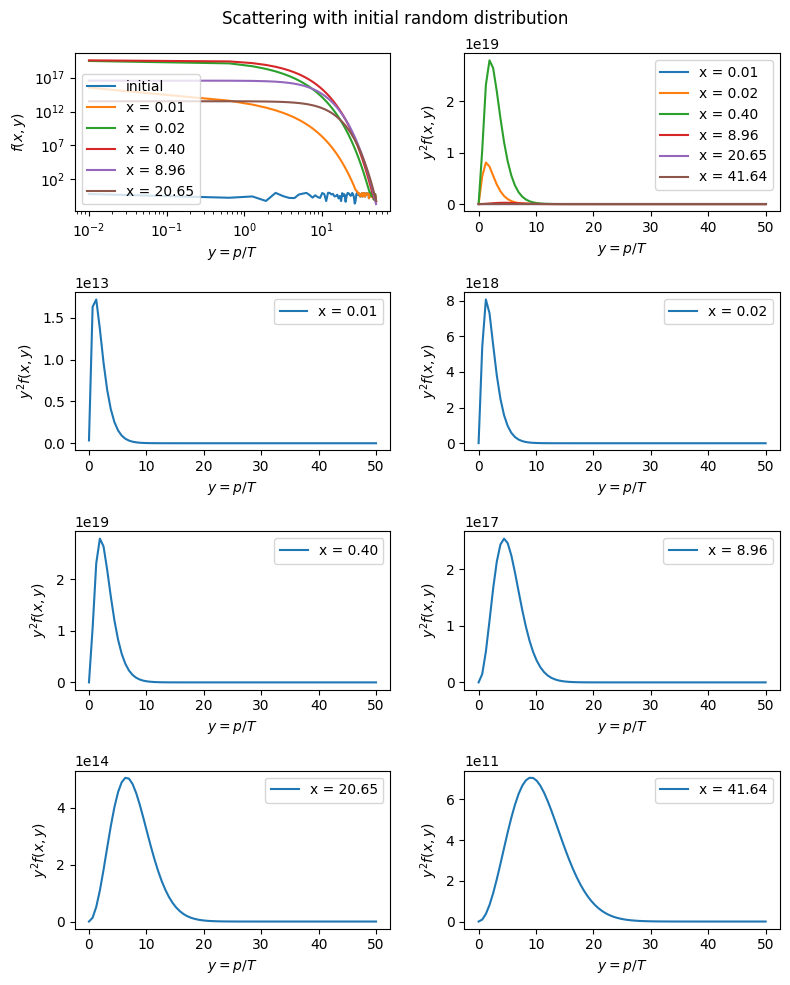

In [4]:
# solve for scattering with initial condition = random distribution
solv = solver(x_span,y_span,random_distribution,"scattering")
xs = solv[0]
ys = solv[1]    
fs = solv[2]
# print(len(xs))

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(8, 10))
axs[0,0].loglog(ys,fs[:,0], label= "initial")
for n in [20,100,160,250,320]:
    axs[0,0].loglog(ys,fs[:,n], label= f"x = {xs[n]:0.2f}")
axs[0,0].set_xlabel(r"$y = p/T$")
axs[0,0].set_ylabel (r"$f(x,y)$")
axs[0,0].legend()

for n in [20,100,160,250,320,400]:
    yyfs = [ys[i] * ys[i] * fs[i][n] for i in range(len(ys))]
    axs[0,1].plot(ys,yyfs, label= f"x = {xs[n]:0.2f}")
axs[0,1].set_xlabel(r"$y = p/T$")
axs[0,1].set_ylabel (r"$y^2f(x,y)$")
axs[0,1].legend()


indicies = [[20,100],[160,250],[320,400]]

for i in range(1,4):
    for j in range(0,2):
        index = indicies[i-1][j]
        yyfs = [ys[k] * ys[k] * fs[k][index] for k in range(len(ys))]
        axs[i,j].plot(ys,yyfs, label= f"x = {xs[index]:0.2f}")
        axs[i,j].set_xlabel(r"$y = p/T$")
        axs[i,j].set_ylabel (r"$y^2f(x,y)$")
        axs[i,j].legend()

plt.suptitle("Scattering with initial random distribution")
fig.tight_layout()

In [5]:
# solve for annihilation and scattering


In [6]:
# solve for annihilation with initial condition = full thermal equilibrium
solv = solver(x_span,y_span,equilibrium,"s-wave annihilation")
xs0 = solv[0]
ys0 = solv[1]    
fs0 = solv[2]
# print(len(xs))

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))
for n in [0,10,20,40,80]:
    axs[0,0].loglog(ys0,fs0[:,n],label=f"f(y={n},x)")
axs[0,0].set_xlabel("y = p/T")
axs[0,0].set_ylabel ("distribution function, f(x,y)")
axs[0,0].set_title("S-wave annihilation")
axs[0,0].legend()

solv = solver(x_span,y_span,equilibrium,"p-wave annihilation")
xs1 = solv[0]
ys1 = solv[1]    
fs1 = solv[2]
for n in [0,10,20,40,80]:
    axs[0,1].loglog(ys1,fs1[:,n],label=f"f(y={n},x)")
axs[0,1].set_xlabel("y = p/T")
axs[0,1].set_ylabel ("distribution function, f(x,y)")
axs[0,1].set_title("P-wave annihilation")
axs[0,1].legend()

indicies = [[10,20],[40,80]]

for i in range(1,3):
    for j in range(0,2):
        index = indicies[i-1][j]
        axs[i,j].loglog(ys0,fs0[:,index], label=f"s-wave, x={xs0[index]:0.2f}")
        axs[i,j].loglog(ys1,fs1[:,index+7], label=f"p-wave, x={xs1[index+7]:0.2f}")
        axs[i,j].set_title(f"Comparison at x = {xs0[index]:0.2f}")
        axs[i,j].set_xlabel(r"$y = p/T$")
        axs[i,j].set_ylabel (r"$f(x,y)$")
        axs[i,j].legend()

fig.tight_layout()

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1mFailed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1mUnknown attribute 'exit' of type Module(<module 'sys' (built-in)>)
[1m
File "solver.py", line 76:[0m
[1m    def collision(f1, f3, y1, y3, x,string):
        <source elided>
        else:
[1m            sys.exit("Unknown collision")
[0m            [1m^[0m[0m
[0m
[0m[1mDuring: typing of get attribute at /home/tobias/Master-Thesis/solver.py (76)[0m
[1m
File "solver.py", line 76:[0m
[1m    def collision(f1, f3, y1, y3, x,string):
        <source elided>
        else:
[1m            sys.exit("Unknown collision")
[0m            [1m^[0m[0m

[0m[1mDuring: Pass nopython_type_inference[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function solver.<locals>.collision at 0x7d77defb7be0>))[0m
[0m[1mDuring: typing of call at /home/tobias/Master-Thesis/solver.py (94)[0m
[1m
File "solver.py", line 94:[0m
[1m    def RHS(x:float, fs:list,string):
        <source elided>
                y3 = ys[j]
[1m                integrand_values[j] = collision(f1, f3, y1, y3, x,string)
[0m                [1m^[0m[0m

[0m[1mDuring: Pass nopython_type_inference[0m